In [1]:
import numpy as np
import os
from scipy.signal import find_peaks
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/au646069/Google Drive/ECG_root/Projects/in_progress/EmotionalMetaMemory/data/Data'

In [3]:
data = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.npy'):
            data.append(np.load(root + '/' + file, allow_pickle=True)[0])

In [21]:
def moving_function(x, win=0.2, sfreq=75, function=np.mean):
    """Return the moving average of the signal.
    
    Parameters
    ----------
    x : array
        The time-serie.
    win : float
        The size of the windows (in seconds)
    sfreq : int
        The sampling frequency.
    function : funct
        The operation to perform. Default is mean (moving average).
    
    Return
    ------
    y : array
        The averaged signal.    
    """
    # Compute moving average
    win = int(win * sfreq)
    y = []
    for i in range(len(x)):
        if i < win/2:
            y.append(function(x[:win]))
        elif (i >= win/2) & (i < len(x - win)):
            y.append(function(x[i-int(win/2):i+int(win/2)]))
        else:
            y.append(function(x[-win:]))
    return np.asarray(y)

In [22]:
def oxi_peaks(x, sfreq=75, win=1, new_sfreq=500):
    """Detecting peaks on PPG signal.

    Parameters
    ----------
    x : list or Numpy array
        The oxi signal.
    sfreq = int
        The sampling frequency. Default is set to 75 Hz.
    win : int
        Window size (in seconds) used to compute the threshold.

    Retruns
    -------
    peaks : Numpy array
        Numpy array containing R peak timing, in sfreq.

    Notes
    -----
    Signal squaring and detection of peaks using threshold set by the moving
    averagte + stadard deviation.

    References
    ----------
    Some of the processing steps are adapted from the HeartPy toolbox:
    https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/index.html

    [1] : van Gent, P., Farah, H., van Nes, N. and van Arem, B., 2019.
    Analysing Noisy Driver Physiology Real-Time Using Off-the-Shelf Sensors:
    Heart Rate Analysis Software from the Taking the Fast Lane Project. Journal
    of Open Research Software, 7(1), p.32. DOI: http://doi.org/10.5334/jors.241
    """
    if isinstance(x, list):
        x = np.asarray(x)

    # Interpolate
    f = interpolate.interp1d(np.arange(0, len(x)/sfreq, 1/sfreq),
                             x,
                             fill_value="extrapolate")
    time = np.arange(0, len(x)/sfreq, 1/new_sfreq)
    x = f(time)

    # Moving average (high frequency noise + clipping)
    x = moving_function(x, win=0.2, sfreq=new_sfreq, function=np.mean)

    # Square signal
    x = x ** 2

    # Compute moving average + standard deviation
    mean_signal = moving_function(x, win=0.75, sfreq=new_sfreq, function=np.mean)
    std_signal = moving_function(x, win=0.75, sfreq=new_sfreq, function=np.std)

    # Substract moving mean + standard deviation
    x -= (mean_signal + std_signal)

    # Find positive peaks
    peaks = find_peaks(x, height=0)[0]

    return peaks

In [ ]:
peaks = oxi_peaks(data[2])

In [8]:
sfreq=75
new_sfreq=500

x = np.asarray(data[2])

# Interpolate
f = interpolate.interp1d(np.arange(0, len(x)/sfreq, 1/sfreq),
                         x,
                         fill_value="extrapolate")
time = np.arange(0, len(x)/sfreq, 1/new_sfreq)
x = f(time)

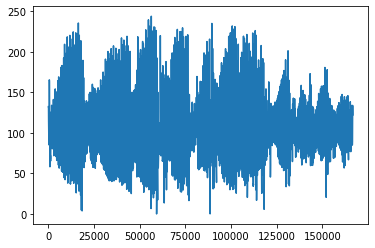

In [10]:
plt.plot(x)

In [9]:
# Moving average (high frequency noise + clipping)
x = moving_function(x, win=0.2, sfreq=new_sfreq, function=np.mean)

In [11]:
# Square signal
x = x ** 2

In [12]:
# Compute moving average + standard deviation
mean_signal = moving_function(x, win=0.75, sfreq=new_sfreq, function=np.mean)
std_signal = moving_function(x, win=0.75, sfreq=new_sfreq, function=np.std)

# Substract moving mean + standard deviation
x -= (mean_signal + std_signal)

In [13]:
# Find positive peaks
peaks = find_peaks(x, height=0)[0]

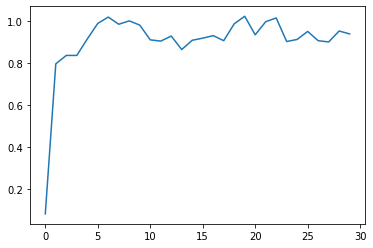

In [19]:
plt.plot((np.diff(peaks)/500)[:30])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         3.,  2.,  4.,  3.,  5.,  5.,  5.,  8.,  7.,  9., 11.,  6., 11.,
         8., 15., 15., 15., 26., 27., 23., 22., 20., 18., 22.,  6., 14.,
         9., 11., 11.,  5.,  5.,  6.,  1.,  5.,  3.,  1.,  0.,  2.,  1.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.084  , 0.09524, 0.10648, 0.11772, 0.12896, 0.1402 , 0.15144,
        0.16268, 0.17392, 0.18516, 0.1964 , 0.20764, 0.21888, 0.23012,
        0.24136, 0.2526 , 0.26384, 0.27508, 0.28632, 0.29756, 0.3088 ,
        0.32004, 0.33128, 0.34252, 0.35376, 0.365  , 0.37624, 0.38748,
        0.39872, 0.40996, 0.4212 , 0.43244, 0.44368, 0.45492, 0.46616,
        0.4774 , 0.48864, 0.49988, 0.51112, 0.52236, 0.5336 , 0.54484,
        

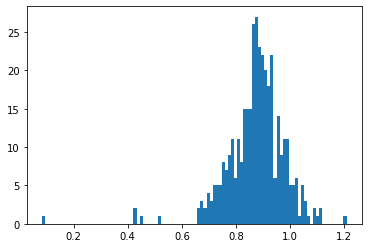

In [14]:
plt.hist(np.diff(peaks)/500, bins=100)

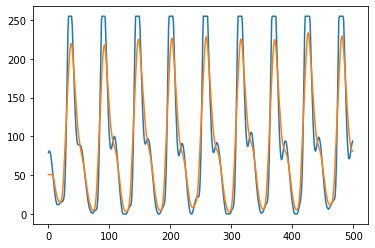

In [24]:
test_data = data[0][:500]
plt.plot(test_data)
plt.plot(moving_function(np.asarray(test_data)))

In [26]:
def heart_rate(peaks, sfreq, unit='rr', method=None):
    """Transform peaks data into heart rate time series.

    Parameters
    ----------
    peaks : array
        Peaks indexes.
    sfreq : int
        Sampling frequency
    method : str
        The method to use.

    Retruns
    -------
    heartrate : array
        The heart rate frequency
    time : array
        Time array.
    """
    time = peaks / 75

    # R-R heartratevals (in miliseconds)
    heartrate = (np.diff(peaks, prepend=peaks[0]) / sfreq) * 1000
    if unit == 'bpm':
        # Beats per minutes
        heartrate = (60 / heartrate) * 1000

    if method is not None:
        if method == 'interpolate':
            f = interpolate.interp1d(time, heartrate, fill_value="extrapolate")
            time = np.arange(0, time[-1], 1/sfreq)
            heartrate = f(time)

        elif method == 'staircase':
            # From 0 to first peak
            heartrate = np.repeat((peaks[0]/sfreq) * 1000, peaks[0])
            for i in range(len(peaks)-1):
                rr = peaks[i+1] - peaks[i]
                a = np.repeat((rr/sfreq) * 1000, rr)
                heartrate = np.append(heartrate, a)
                time = np.arange(0, peaks[-1]/sfreq, 1/sfreq)

            if unit == 'bpm':
                # Beats per minutes
                heartrate = 60000/heartrate
        else:
            raise ValueError('Invalid method')

    return heartrate, time


In [42]:
hr, time = heart_rate(peaks[:100], 500, method='staircase', unit='bpm')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


(0, 100)

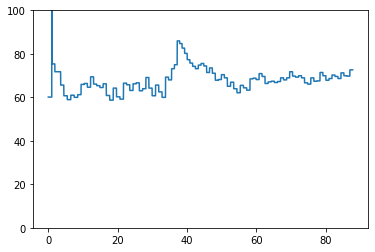

In [43]:
plt.plot(time, hr)
plt.ylim(0, 100)